# **English Premier League Statistics Analysis**
Fall 2024 Data Science Project

Collaborators: Mohid Basha: 118795980; Musa Waseem: 118849355; Ayush Patel: 118678191;
Karim Abdallah: 118894478; Matthew Wong: 117945782; Yash Mohan: 118953281


# Contributions

A: Project idea

B: Dataset Curation and Preprocessing

C: Data Exploration and Summary Statistics

D: ML Algorithm Design/Development

E: ML Algorithm Training and Test Data Analysis

F: Visualization, Result Analysis, Conclusion

G: Final Tutorial Report Creation

H: Additional (not listed above)

Musa: G, F, A, C; Musa worked on T-test exploration, discussed initial project ideas, worked on introduction/conclusion writing, final report writing, and GitHub management.

Mohid: A, B, C, G; Mohid worked on discussing the initial project ideas, locating and gathering data sources, cleaning the datasets and deriving summary statistics, correlation test exploration, and writing the introduction and structuring the final report.

Ayush: A, B, C, D, E, F: Ayush worked on helping to create the initial project idea, then find the data sources, and then curate and explore the data. After that, he worked on the clustering model and found insights and created visuals from there.

Karim: A, B, C, G; Karim worked on project idea exploration, helped gather data, preprocessed and cleaned the datasets, derived summary statistics, helped with data exploration, and worked on the introduction and data curation sections in our final report.

Yash: A, B, F, G; Yash worked on discussing the project idea, helped gather datasets and methods to use for the data in the project, and worked on the conclusion of our research methods for the final report.

Matthew: A, C, D, E, F: Matthew worked on writing the hypotheses, graphing, and writing the conclusion for the home vs. away goals statistics. He also worked on the ML design, development, training, test data analysis, visualization, and conclusion of home field advantage.


# Introduction

The Premier League, based in England, is home to some of the world's top soccer players and clubs, making it a global benchmark for excellence in the sport. As the most-watched league, reaching 920 million homes across 189 countries, its immense popularity generates vast amounts of data from matches, players, teams, and fan engagement. These datasets provide a unique opportunity for data scientists to analyze trends, optimize performance, predict outcomes, and even uncover insights into the league's influence on global culture and commerce.

The aim of this project is to analyze the past team standings and goals for different teams from the years 1993 - 2025 in the Premier League to identify future winners and related information of the matchups for the upcoming season. This will be conducted through undergoing the full data science pipeline and lifecycle from data curation, exploratory analysis, machine learning, and determining valuable insights and visualizations as such. Combining the past team standings and goals together and conducting an analysis allows us to discover the overall winner of the league and key insights on Premier League data. Besides the winner projections, we can further analyze the goals scored, along with the shot percentages from player shooting stats. This analysis is important as it can help identify common trends, aiding teams in optimizing their performance for upcoming seasons. Additionally, from the perspective of soccer/football fans, the analysis will provide a better understanding of common behaviors in the Premier League, leading to a better viewing experience overall.


# Data Collection


Datasets Chosen:

Our data science pipeline involves three key datasets regarding match data, standings data, and shooting statistics data.

**Premier League Match Data (1993 - 2023):**

https://www.kaggle.com/datasets/evangower/premier-league-matches-19922022



*   Important variables: Home Goals, Away Goals, who won the match (FTR), result from each match up with every other team each season.




**Premier League Standings Data (1993 - 2025):**


https://www.kaggle.com/datasets/evangower/english-premier-league-standings
https://fbref.com/en/comps/9/2023-2024/2023-2024-Premier-League-Stats



*   Important Variables: total games won, total games drawn, total games lost, goals forward (scored), goals allowed (conceded)


**Premier League Player Shooting Stats and Match Data (2016 - 2025):**


https://www.kaggle.com/datasets/efaniorimutembo/epl-player-shooting-stats-23-24-premier-league

https://www.kaggle.com/datasets/danilocardoso/premier-league-20232024

https://fbref.com/en/comps/9/2022-2023/shooting/2022-2023-Premier-League-Stats
https://fbref.com/en/comps/9/shooting/Premier-League-Stats



*   Important Variables: percentage of shots on target, total shots per game, total xG (expected goals) per team for entire season, total expected penalty kicks per team for entire season


**Reason for Choosing Datasets:**


*Premier League Match Data (1993 - 2023):*

Datasets contain home vs. away results of teams, which can be used examine the impact of home field advantage on teams’ performance
We can look at total goals from the 1995 season onwards, since that is when the 38 game schedule was implemented

*Premier League Standings Data (1993 - 2024):*

Goal difference analysis - considering the number of goals scored vs number of goals conceded to draw conclusions on team performance
We can look at total goals from the 1995 season onwards, since that is when the 38 game schedule was implemented

*Premier League Standings and Shooting Data (2016 - 2024):*

Datasets for the 23-24 season standings and player shooting stats can be combined to look at player shooting stats and their impact on a team’s performance


# Exploratory Data Analysis:

# Data preprocessing:

In [582]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.stats.weightstats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Loading in Premier League Match Data (1996 - 2023) - "premier-league-matches.csv"

In [583]:
pl_matches_df = pd.read_csv('premier-league-matches.csv')
pl_matches_df

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A


In [584]:
pl_matches_df = pl_matches_df[pl_matches_df['Season_End_Year'] >= 1996]
pl_matches_df.reset_index(drop=True, inplace=True)

In [585]:
pl_matches_df.isna().sum()

,0
Season_End_Year,0
Wk,0
Date,0
Home,0
HomeGoals,0
AwayGoals,0
Away,0
FTR,0


In [586]:
pl_matches_df.groupby('Season_End_Year').describe()

Wk                                                \
                 count  mean        std  min   25%   50%   75%   max   
Season_End_Year                                                        
1996             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
1997             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
1998             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
1999             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2000             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2001             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2002             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2003             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2004             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2005             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2006             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2007             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2008             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2009             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2010             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2011             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2012             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2013             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2014             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2015             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2016             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2017             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2018             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2019             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2020             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2021             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2022             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2023             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   

                HomeGoals            ...           AwayGoals            \
                    count      mean  ...  75%  max     count      mean   
Season_End_Year                      ...                                 
1996                380.0  1.526316  ...  2.0  7.0     380.0  1.073684   
1997                380.0  1.471053  ...  2.0  7.0     380.0  1.081579   
1998                380.0  1.557895  ...  2.0  7.0     380.0  1.123684   
1999                380.0  1.455263  ...  2.0  7.0     380.0  1.068421   
2000                380.0  1.671053  ...  2.0  8.0     380.0  1.118421   
2001                380.0  1.544737  ...  2.0  6.0     380.0  1.065789   
2002                380.0  1.465789  ...  2.0  7.0     380.0  1.168421   
2003                380.0  1.500000  ...  2.0  6.0     380.0  1.131579   
2004                380.0  1.505263  ...  2.0  6.0     380.0  1.157895   
2005                380.0  1.500000  ...  2.0  7.0     380.0  1.065789   
2006                380.0  1.460526  ...  2.0  7.0     380.0  1.023684   
2007                380.0  1.452632  ...  2.0  6.0     380.0  0.997368   
2008                380.0  1.528947  ...  2.0  8.0     380.0  1.107895   
2009                380.0  1.400000  ...  2.0  6.0     380.0  1.078947   
2010                380.0  1.697368  ...  2.0  9.0     380.0  1.073684   
2011                380.0  1.623684  ...  2.0  7.0     380.0  1.173684   
2012                380.0  1.589474  ...  2.0  8.0     380.0  1.215789   
2013                380.0  1.557895  ...  2.0  8.0     380.0  1.239474   
2014                380.0  1.573684  ...  2.0  7.0     380.0  1.194737   
2015                380.0  1.473684  ...  2.0  8.0     380.0  1.092105   
2016                380.0  1.492105  ...  2.0  6.0     380.0  1.207895   
2017       

In [587]:
pl_matches_df.dtypes

,0
Season_End_Year,int64
Wk,int64
Date,object
Home,object
HomeGoals,int64
AwayGoals,int64
Away,object
FTR,object


In [588]:
print(len(pl_matches_df))

10640


In [589]:
print(f"Number of Rows: {pl_matches_df.shape[0]}")
print(f"Number of Features/Columns: {pl_matches_df.shape[1]}")

Number of Rows: 10640
Number of Features/Columns: 8


In [590]:
pl_matches_df

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1996,1,1995-08-19,Wimbledon,3,2,Bolton,H
1,1996,1,1995-08-19,Newcastle Utd,3,0,Coventry City,H
2,1996,1,1995-08-19,Manchester City,1,1,Tottenham,D
3,1996,1,1995-08-19,Aston Villa,3,1,Manchester Utd,H
4,1996,1,1995-08-19,Blackburn,1,0,QPR,H
...,...,...,...,...,...,...,...,...
10635,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
10636,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
10637,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
10638,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A


**There are 12026 rows in this dataframe, which spans from 1993-2023. However, after the 1996 season, the number of games played in a season changed. In order to solve this, we dropped the rows that have information from before 1996. There are no NaN values in the table, so did not have to worry about dropping anything else. We will use this dataset in relation with the standings dataset to compare mutliple variables together. **

# Loading in Premier League Standings Data (1996 - 2024) - "pl-tables-1993-2024.csv"

In [591]:
pl_standings_df = pd.read_csv('pl-tables-1993-2024.csv')
pl_standings_df

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Norwich City,3,42,21,9,12,61,65,-4,72,→ UEFA Cup via league finish 1
3,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
4,1993,QPR,5,42,17,12,13,63,55,8,63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,2024,Brentford,16,38,10,9,19,56,65,-9,39,NaN
642,2024,Nottingham Forest,17,38,9,9,20,49,67,-18,32,4-point deduction
643,2024,Luton Town,18,38,6,8,24,52,85,-33,26,Relegated
644,2024,Burnley,19,38,5,9,24,41,78,-37,24,Relegated


In [592]:
pl_standings_df = pl_standings_df[pl_standings_df['season_end_year'] >= 1996]
pl_standings_df.reset_index(drop=True, inplace=True)
pl_standings_df

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1996,Manchester Utd,1,38,25,7,6,73,35,38,82,→ Champions League via league finish
1,1996,Newcastle Utd,2,38,24,6,8,66,37,29,78,→ UEFA Cup via league finish
2,1996,Liverpool,3,38,20,11,7,70,34,36,71,→ UEFA Cup Winners' Cup via cup win 1
3,1996,Aston Villa,4,38,18,9,11,52,35,17,63,→ UEFA Cup via league finish
4,1996,Arsenal,5,38,17,12,9,49,32,17,63,→ UEFA Cup via league finish 2
...,...,...,...,...,...,...,...,...,...,...,...,...
575,2024,Brentford,16,38,10,9,19,56,65,-9,39,NaN
576,2024,Nottingham Forest,17,38,9,9,20,49,67,-18,32,4-point deduction
577,2024,Luton Town,18,38,6,8,24,52,85,-33,26,Relegated
578,2024,Burnley,19,38,5,9,24,41,78,-37,24,Relegated


In [593]:
pl_standings_df.isna().sum()

,0
season_end_year,0
team,0
position,0
played,0
won,0
drawn,0
lost,0
gf,0
ga,0
gd,0


In [594]:
pl_standings_df.drop("notes", axis='columns')

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points
0,1996,Manchester Utd,1,38,25,7,6,73,35,38,82
1,1996,Newcastle Utd,2,38,24,6,8,66,37,29,78
2,1996,Liverpool,3,38,20,11,7,70,34,36,71
3,1996,Aston Villa,4,38,18,9,11,52,35,17,63
4,1996,Arsenal,5,38,17,12,9,49,32,17,63
...,...,...,...,...,...,...,...,...,...,...,...
575,2024,Brentford,16,38,10,9,19,56,65,-9,39
576,2024,Nottingham Forest,17,38,9,9,20,49,67,-18,32
577,2024,Luton Town,18,38,6,8,24,52,85,-33,26
578,2024,Burnley,19,38,5,9,24,41,78,-37,24


In [595]:
pl_standings_2024_df = pl_standings_df[pl_standings_df['season_end_year'] == 2024]
pl_standings_2024_df.reset_index(drop=True, inplace=True)
pl_standings_2024_df = pl_standings_2024_df.drop("notes", axis='columns')
pl_standings_2024_df

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points
0,2024,Manchester City,1,38,28,7,3,96,34,62,91
1,2024,Arsenal,2,38,28,5,5,91,29,62,89
2,2024,Liverpool,3,38,24,10,4,86,41,45,82
3,2024,Aston Villa,4,38,20,8,10,76,61,15,68
4,2024,Tottenham,5,38,20,6,12,74,61,13,66
5,2024,Chelsea,6,38,18,9,11,77,63,14,63
6,2024,Newcastle Utd,7,38,18,6,14,85,62,23,60
7,2024,Manchester Utd,8,38,18,6,14,57,58,-1,60
8,2024,West Ham,9,38,14,10,14,60,74,-14,52
9,2024,Crystal Palace,10,38,13,10,15,57,58,-1,49


In [596]:
print(f"Number of Rows: {pl_standings_df.shape[0]}")
print(f"Number of Features/Columns: {pl_standings_df.shape[1]}")

Number of Rows: 580
Number of Features/Columns: 12


In [597]:
pl_standings_df.groupby('season_end_year').describe()

position                                              played  \
                   count  mean      std  min   25%   50%    75%   max  count   
season_end_year                                                                
1996                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
1997                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
1998                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
1999                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2000                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2001                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2002                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2003                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2004                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2005                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2006                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2007                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2008                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2009                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2010                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2011                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2012                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2013                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2014                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2015                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2016                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2017                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2018                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2019                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2020                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2021                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2022                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2023                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2024                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   

                       ...     gd       points                                 \
                 mean  ...    75%   max  count   mean        std   min    25%   
season_end_year        ...                                                      
1996             38.0  ...  17.00  38.0   20.0  52.10  15.161933  29.0  39.50   
1997             38.0  ...   5.50  33.0   20.0  50.90  12.043343  34.0  41.75   
1998             38.0  ...  10.25  47.0   20.0  52.25  12.430332  33.0  44.00   
1999             38.0  ...   8.50  43.0   20.0  51.25  13.999530  30.0  42.00   
2000             38.0  ...  12.00  52.0   20.0  52.40  16.063689  24.0  42.50   
2001             38.0  ...  16.50  48.0   20.0  51.95  13.971682  26.0  42.00   
2002             38.0  ...  17.50  43.0   20.0  51.95  16.687452  28.0  42.25   
2003             38.0  ...  10.50  43.0   20.0  52.50  15.322842  19.0  46.50   
2004             38.0  ...   7.50  47.0   20.0  51.60  15.177546  33.0  43.25   
2005             38.0  ...   7.25  57.0   20.0  51.50  17.083387  32.0  41.25   
2006             38.0  ...  10.50  50.0   20.0  53.15  18.610340  15.0  42.75   
2007             38.0  ...   7.75  56.0   20.0  52.10  15.850950  28.0  40.50   
2008             38.0  ...  20.50  58.0   20.0  52.00  19.735088  11.0  38.50   
2009             38.0  ...  10.50  50.0   20.0  52.15  18.236098  32.0  39.75   
2010             38.0  ...  26.00  71.0   20.0  51.75  18.873192  19.0  37.50 

In [598]:
pl_standings_df.dtypes

,0
season_end_year,int64
team,object
position,int64
played,int64
won,int64
drawn,int64
lost,int64
gf,int64
ga,int64
gd,int64


In [599]:
print(len(pl_standings_df))
print(len(pl_standings_df.drop_duplicates()))

580
580


Similar to the first dataset, there are some uneven values. The number of teams in the league changed from 22 to 20 in 1996, so we only considered the years past this to make it more consistent. After removing these rows, we also found that the notes column was not very helpful for anything, and it had many null values, so we dropped the whole column. This dataset could be used to compare multiple variables from across the three datasets.

# Loading in Premier League Standings Data (1996 - 2024) - "pl-tables-1993-2024.csv"

In [600]:
df = pd.read_html('https://fbref.com/en/comps/9/2023-2024/shooting/2023-2024-Premier-League-Stats')
df_pl_shooting_2024 = df[0]

df_pl_shooting_2024.to_csv('df_pl_shooting_2024.csv')

df_pl_shooting_2024 = pd.read_csv('df_pl_shooting_2024.csv')
df_pl_shooting_2024.columns = df_pl_shooting_2024.iloc[0]
df_pl_shooting_2024 = df_pl_shooting_2024[1:]
del df_pl_shooting_2024[df_pl_shooting_2024.columns[0]]
df_pl_shooting_2024.reset_index(drop=True, inplace=True)
df_pl_shooting_2024

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Arsenal,25,38.0,86,647,209,32.3,17.03,5.5,0.12,0.36,15.8,6,10,10,76.1,68.5,0.11,9.9,7.5
1,Aston Villa,31,38.0,72,511,182,35.6,13.45,4.79,0.13,0.37,16.0,15,4,4,63.3,60.3,0.12,8.7,7.7
2,Bournemouth,30,38.0,52,539,175,32.5,14.18,4.61,0.09,0.29,16.7,18,2,3,55.9,53.6,0.1,-3.9,-3.6
3,Brentford,28,38.0,54,470,159,33.8,12.37,4.18,0.11,0.32,15.6,17,3,3,58.2,56.0,0.12,-4.2,-5.0
4,Brighton,30,38.0,50,555,198,35.7,14.61,5.21,0.08,0.23,16.7,11,5,6,56.8,52.2,0.1,-6.8,-7.2
5,Burnley,31,38.0,40,430,137,31.9,11.32,3.61,0.09,0.27,17.7,13,3,3,40.6,38.3,0.09,-0.6,-1.3
6,Chelsea,32,38.0,76,537,194,36.1,14.13,5.11,0.12,0.34,17.3,22,11,12,74.5,65.1,0.12,1.5,-0.1
7,Crystal Palace,26,38.0,56,452,162,35.8,11.89,4.26,0.12,0.32,17.2,20,4,4,48.6,45.4,0.1,7.4,6.6
8,Everton,26,38.0,40,504,152,30.2,13.26,4.0,0.08,0.25,16.7,14,2,3,54.0,51.6,0.11,-14.0,-13.6
9,Fulham,25,38.0,54,499,175,35.1,13.13,4.61,0.1,0.3,17.0,14,2,2,50.8,49.2,0.1,3.2,2.8


In [601]:
df_pl_shooting_2024.describe()

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
count,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
unique,20,10,1,17,20,18,18,20,18,8,13,14,14,10,10,20,20,5,20,20
top,Arsenal,25,38.0,54,647,175,32.5,17.03,4.61,0.12,0.32,16.7,11,4,3,76.1,68.5,0.11,9.9,7.5
freq,1,3,20,2,1,2,2,1,2,6,4,4,3,4,4,1,1,7,1,1


In [602]:
print(f"Number of Rows/Teams: {df_pl_shooting_2024.shape[0]}")
print(f"Number of Features/Columns: {df_pl_shooting_2024.shape[1]}")

Number of Rows/Teams: 20
Number of Features/Columns: 20


We webscraped a dataset from FBREF. We brought the data in as an html and then converted it into a csv for easier access. Since we converted it into a csv, the column names were integrated into the dataset as the first row, so we fixed this by making the first row into the column names.

# Basic Data Exploration and Summary Statistics

Our datasets are primarily all numerical variables (non-categorical) hence this attribute has guided our decision-making in terms of our choices for our analysis techniques.

The goal of the following code is to see if there is a correlation between the shot percentage of a team and their standing at the end of the year.
We will conduct a pearson correlation test to see the relationship between the variables


The correlation_coefficient r = 0.572041508881513


Text(0.5, 1.0, 'Position vs Shot Percentage')

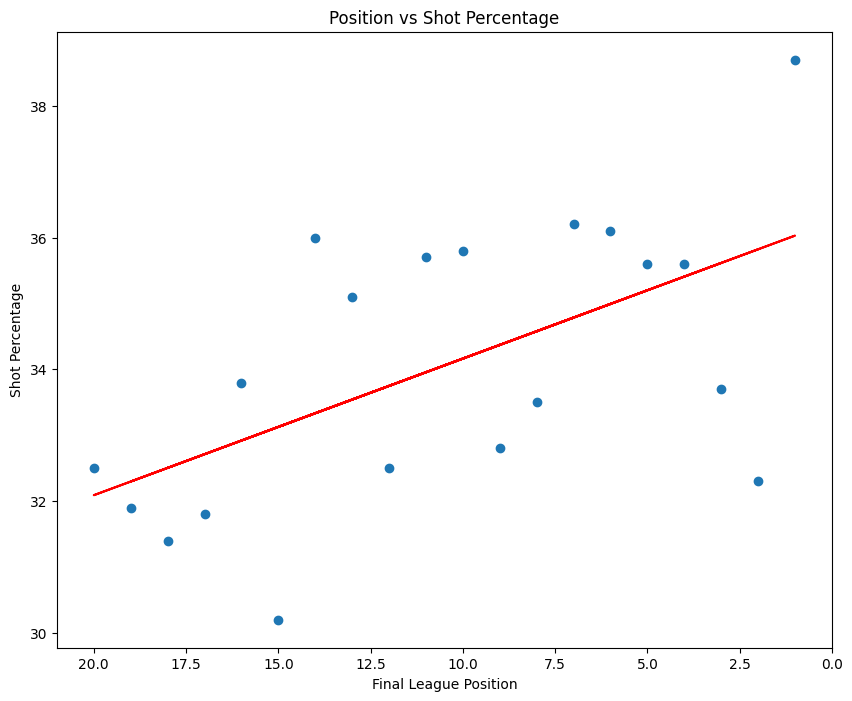

In [603]:
# Set the shot percentage as a float
df_pl_shooting_2024['SoT%'] = df_pl_shooting_2024['SoT%'].astype(float)
shot_percentage = df_pl_shooting_2024['SoT%'].astype(float)

# Sort by teams in 2024
pl_standings_df = pl_standings_df.sort_values('team')
season_end_year_2024 = pl_standings_df[pl_standings_df['season_end_year']==2024]

positions_2024 = season_end_year_2024['position']


correlation_coefficient = np.corrcoef(shot_percentage, positions_2024)[0, 1]
print(f'The correlation_coefficient r = {-correlation_coefficient}')

# Graph plot
a, b = np.polyfit(positions_2024, shot_percentage, 1)

plt.figure(figsize = (10, 8))
plt.scatter(positions_2024, shot_percentage)
plt.xlim(max(positions_2024)+1, min(positions_2024)-1)
plt.plot(positions_2024, a*positions_2024 + b, color = 'red')
plt.xlabel('Final League Position')
plt.ylabel('Shot Percentage')
plt.title('Position vs Shot Percentage')


Conclusion: We used np.corrcoef to find the relationship between these two variables. We received a correlation coefficent of .572, meaning that there is a moderate, positive relationship between the total shooting percentage from a team and their rank at the end of the year.

Below we will be conducting a paired t-test with an alpha value of 0.05 using the mean goals and the expected mean goals for the 2023-2024 Premier League season. The dataset of '2023-2024-Premier-League-Stats' contains both of these variables with no null values for each team. We also will display the box plots for each column, demonstrating the min, max, median, and IQR etc.

H0: There is no significant difference between the mean goals and the expected mean goals for the 2023-2024 season.

Ha: There is indeed a significant difference between the mean goals and the expected mean goals for the 2023-2024 season.

TtestResult(statistic=0.6296899151753186, pvalue=0.5363968845560343, df=19)


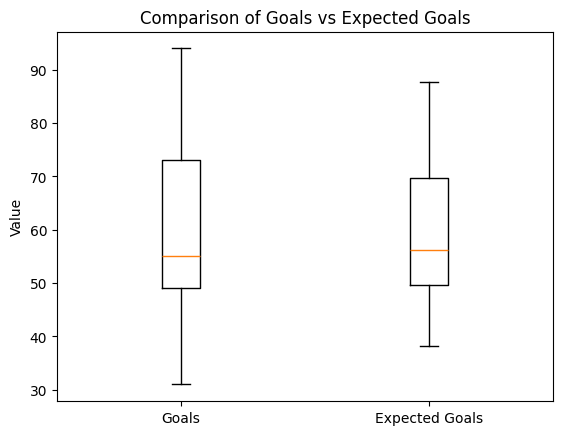

In [604]:
#run t test for goals vs expected goals to determine if there is a big difference between the means
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

# convert both columns to floats
df_pl_shooting_2024['Gls'] = df_pl_shooting_2024['Gls'].astype(float)
df_pl_shooting_2024['xG'] = df_pl_shooting_2024['xG'].astype(float)

# conduct t test for the goals vs expected goals
print(ttest_rel(df_pl_shooting_2024['Gls'], df_pl_shooting_2024['xG']))


# make boxplot for the two variables
plt.boxplot([df_pl_shooting_2024['Gls'], df_pl_shooting_2024['xG']], labels=['Goals', 'Expected Goals'])
plt.title('Comparison of Goals vs Expected Goals')
plt.ylabel('Value')
plt.show()





Conclusion: After running the t-test, we calculated a p value of approximately 0.536 rounded to three decimal places. Hence, since 0.536 > 0.05, we fail to reject the null hypothesis. Therefore, we can conclude that there is not a statistically significant difference between the mean goals and expected mean goals for the 2023-2024 season.


H0: There is no significant difference between the home goals and away goals (There is no home field advantage).

Ha: There is indeed a significant difference between the home goals and away goals (There is a home field advantage).

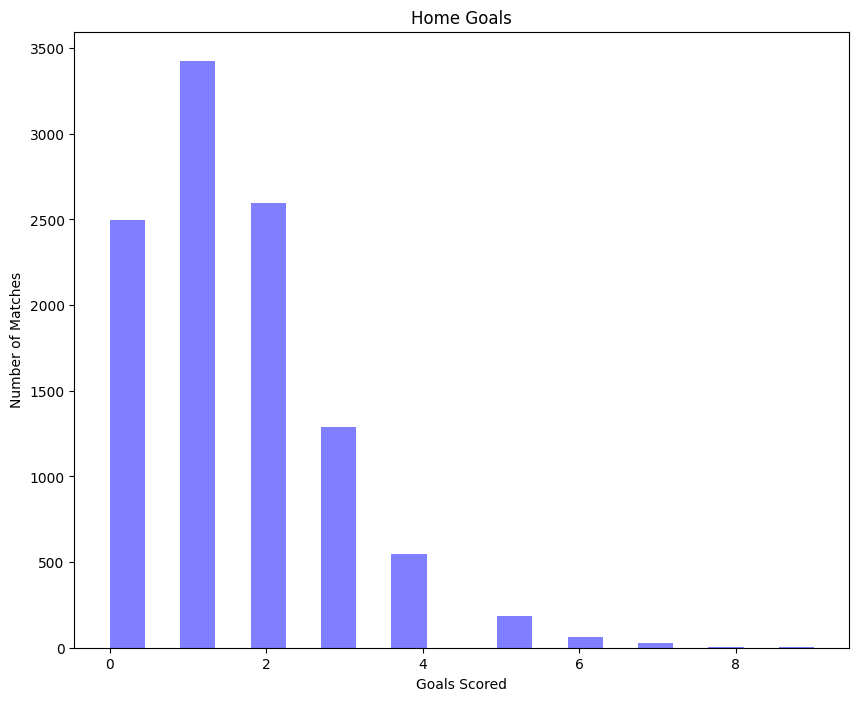

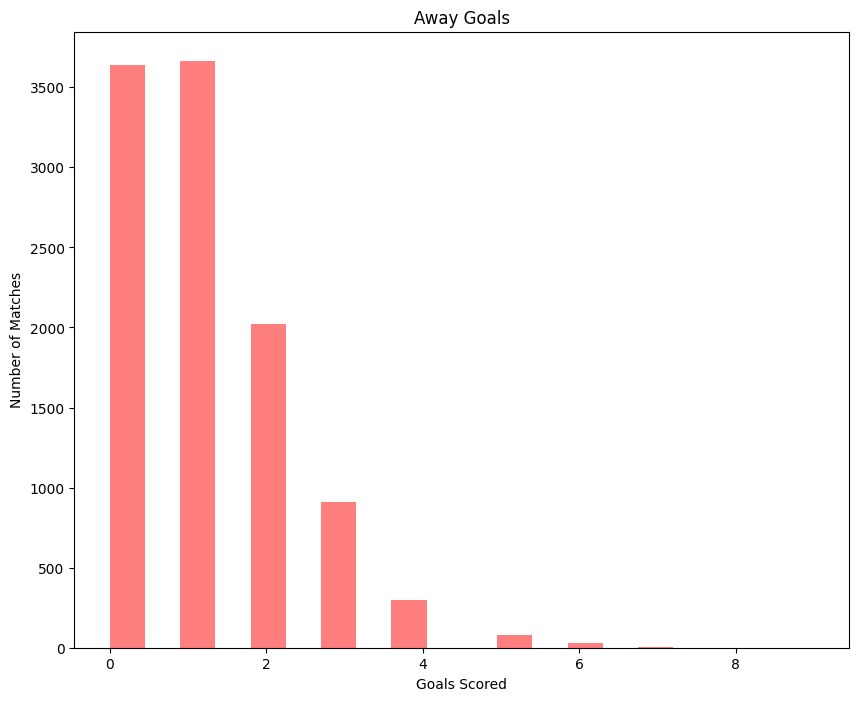

In [605]:
plt.figure(figsize=(10, 8))
plt.hist(pl_matches_df["HomeGoals"],bins=20, alpha=0.5, label='HomeGoals', color='blue')
plt.xlabel('Goals Scored')
plt.ylabel('Number of Matches')
plt.title('Home Goals')
plt.show()

plt.figure(figsize=(10, 8))
plt.hist(pl_matches_df["AwayGoals"],bins=20, alpha=0.5, label='AwayGoals', color='red')
plt.xlabel('Goals Scored')
plt.ylabel('Number of Matches')
plt.title('Away Goals')
plt.show()

In [606]:
z_score, p_value = stats.ztest(pl_matches_df['HomeGoals'], pl_matches_df['AwayGoals'])
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")


Z-score: 22.534334962515782
P-value: 1.9128860556183869e-112


Conclusion: Although the p value is extremely small, we can still accept it and see that it is less than our alpha value of .05. This means that we reject the null, and accept the alternate hypthesis that there is a difference between the number of home goals and away goals.



# Primary Analysis & Visualization

<ipython-input-607-d41adf5d8d3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position'] = pl_standings_2024_df['position']
<ipython-input-607-d41adf5d8d3e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['xG', 'Gls']] = scaler.fit_transform(data[['xG', 'Gls']])


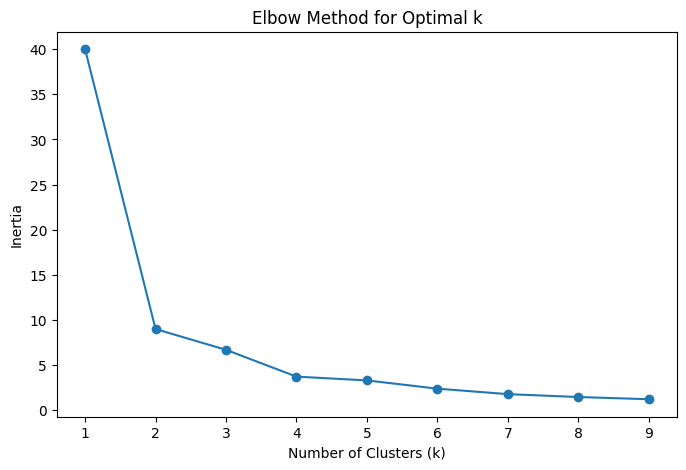

In [607]:
# Add the columns needed from the two dataframes
data = df_pl_shooting_2024[['Squad', 'xG', 'Gls']]
data['position'] = pl_standings_2024_df['position']

# Normalize the data
scaler = StandardScaler()
data[['xG', 'Gls']] = scaler.fit_transform(data[['xG', 'Gls']])

inertia = []
k_values = range(1, 10)

# Creating elbow
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['xG', 'Gls']])
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

3 seems to be the optimal number of clusters

<ipython-input-608-b2e10ceeb6a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.fit_predict(data[['xG', 'Gls']])


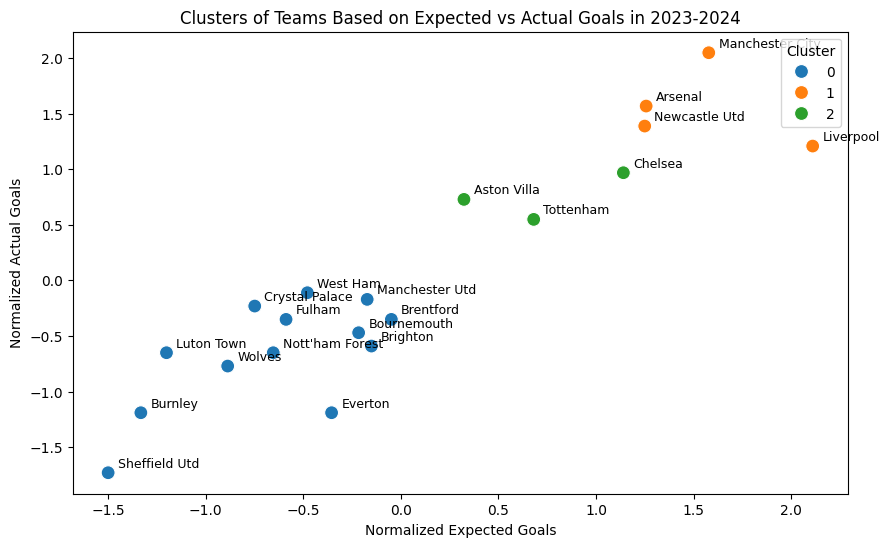

In [608]:
# 3 clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['xG', 'Gls']])

# Points
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='xG', y='Gls',
    hue='cluster', palette = 'tab10', data=data, s=100
)

# Labels
for i, row in data.iterrows():
    plt.text(
        row['xG'] + 0.05,
        row['Gls'] + 0.05,
        row['Squad'],
        fontsize=9
    )

plt.title('Clusters of Teams Based on Expected vs Actual Goals in 2023-2024')
plt.xlabel('Normalized Expected Goals')
plt.ylabel('Normalized Actual Goals')
plt.legend(title='Cluster')
plt.show()

Cluster 0: Teams that performed below their expected

Cluster 1: Teams that performed above their expected

Cluster 2: Teams that performed at their expected

From this, we can see the three groups that were made. They are separated fairly well, and we can see the cutoff between them.

In [609]:
print(f'Average rank for Cluster 0: {13.4}')
print(f'Average rank for Cluster 1: {3.3}')
print(f'Average rank for Cluster 2: {5}')

Average rank for Cluster 0: 13.4
Average rank for Cluster 1: 3.3
Average rank for Cluster 2: 5


For the three clusters we have, we can see that they correspond well with the average position ended with. From this, we can conclude that there is a correlation with expected goals and actual goals. All of the higher ranked teams in the 2023-2024 season have finished with a higher number of actual goals than expected.

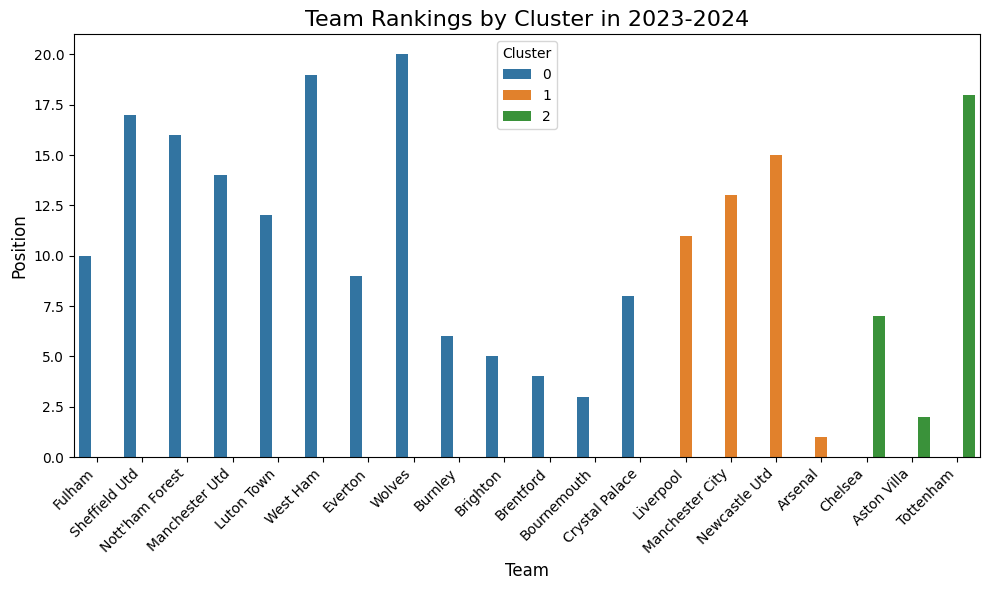

In [610]:
plt.figure(figsize=(10, 6))
data = data.sort_values(by='cluster', ascending=True)
sns.barplot(
    data=data,
    x='Squad',
    y='position',
    hue='cluster',
    dodge=True,
    palette='tab10'
)


plt.title('Team Rankings by Cluster in 2023-2024', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Position', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()

plt.show()

This graph shows the grouping of the three clusters. The bars with the same color tend to have be within a similar range of ranking.

Let's introduce a new dataset. This one is for this year.

In [611]:
df = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
pl_standings_2025_df = df[0]
pl_standings_2025_df.to_csv('pl_standings_2025.csv')
pl_standings_2025_df.drop(["Goalkeeper", "Notes", "Attendance", "Top Team Scorer", "Last 5"], axis='columns', inplace = True)

pl_standings_2025_df

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
0,1,Liverpool,13,11,1,1,26,8,18,34,2.62,26.6,11.4,15.2,1.17
1,2,Arsenal,13,7,4,2,26,14,12,25,1.92,21.7,13.8,7.9,0.61
2,3,Chelsea,13,7,4,2,26,14,12,25,1.92,24.0,17.4,6.6,0.51
3,4,Brighton,13,6,5,2,22,17,5,23,1.77,19.0,21.0,-1.9,-0.15
4,5,Manchester City,13,7,2,4,22,19,3,23,1.77,25.0,19.0,6.0,0.46
5,6,Nott'ham Forest,13,6,4,3,16,13,3,22,1.69,16.1,12.9,3.2,0.25
6,7,Tottenham,13,6,2,5,28,14,14,20,1.54,24.6,16.6,8.0,0.61
7,8,Brentford,13,6,2,5,26,23,3,20,1.54,21.7,21.5,0.1,0.01
8,9,Manchester Utd,13,5,4,4,17,13,4,19,1.46,19.2,18.9,0.3,0.03
9,10,Fulham,13,5,4,4,18,18,0,19,1.46,19.5,14.8,4.7,0.36


In [612]:
df = pd.read_html('https://fbref.com/en/comps/9/shooting/Premier-League-Stats')
df_pl_shooting_2025 = df[0]
df_pl_shooting_2025.to_csv('df_pl_shooting_2025.csv')
df_pl_shooting_2025 = pd.read_csv('df_pl_shooting_2025.csv', skiprows=1)
df_pl_shooting_2025.drop("Unnamed: 0", axis = "columns", inplace = True)
df_pl_shooting_2025

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Arsenal,23,13.0,25,185,64,34.6,14.23,4.92,0.12,0.36,15.2,1,2,2,21.7,20.2,0.11,3.3,2.8
1,Aston Villa,22,13.0,18,162,48,29.6,12.46,3.69,0.11,0.38,15.4,4,0,1,20.4,19.7,0.13,-2.4,-1.7
2,Bournemouth,24,13.0,20,193,60,31.1,14.85,4.62,0.08,0.27,17.7,4,4,5,23.7,19.8,0.10,-3.7,-3.8
3,Brentford,21,13.0,26,143,65,45.5,11.00,5.00,0.17,0.37,15.5,5,2,2,21.7,20.1,0.14,4.3,3.9
4,Brighton,28,13.0,22,187,60,32.1,14.38,4.62,0.12,0.37,17.0,10,0,0,19.0,19.0,0.10,3.0,3.0
5,Chelsea,23,13.0,26,186,68,36.6,14.31,5.23,0.13,0.37,16.5,7,1,1,24.0,23.2,0.13,2.0,1.8
6,Crystal Palace,25,13.0,10,186,59,31.7,14.31,4.54,0.05,0.15,17.6,6,1,1,16.8,16.0,0.09,-6.8,-7.0
7,Everton,23,13.0,10,166,50,30.1,12.77,3.85,0.06,0.20,17.4,7,0,0,13.7,13.7,0.08,-3.7,-3.7
8,Fulham,22,13.0,18,194,67,34.5,14.92,5.15,0.09,0.25,16.3,3,1,2,19.5,17.9,0.09,-1.5,-0.9
9,Ipswich Town,28,13.0,13,126,41,32.5,9.69,3.15,0.10,0.32,16.7,5,0,0,12.3,12.3,0.10,0.7,0.7


<ipython-input-613-619ae5bc246e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position'] = pl_standings_2025_df['Rk']
<ipython-input-613-619ae5bc246e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['xG', 'Gls']] = scaler.fit_transform(data[['xG', 'Gls']])
<ipython-input-613-619ae5bc246e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

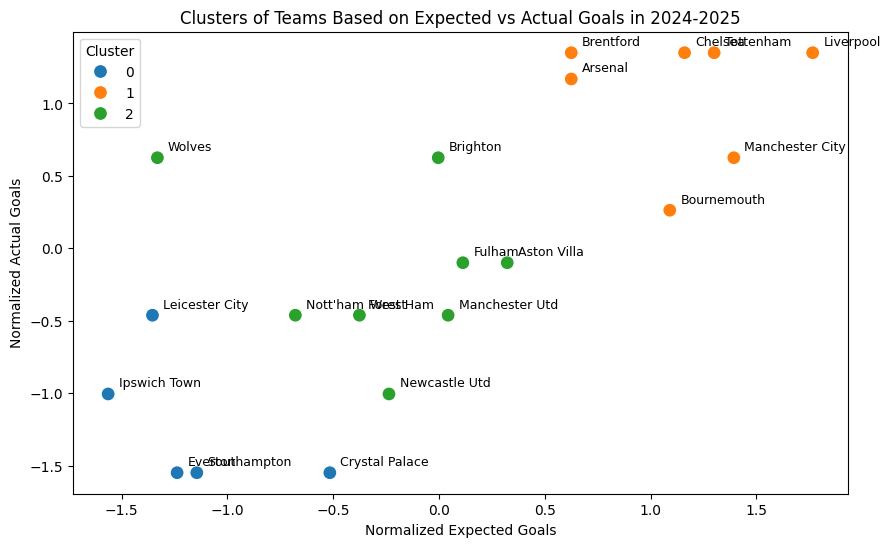

In [613]:
data = df_pl_shooting_2025[['Squad', 'xG', 'Gls']]
data['position'] = pl_standings_2025_df['Rk']
scaler = StandardScaler()
data[['xG', 'Gls']] = scaler.fit_transform(data[['xG', 'Gls']])


k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['xG', 'Gls']])


plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='xG', y='Gls',
    hue='cluster', palette = 'tab10', data=data, s=100
)

for i, row in data.iterrows():
    plt.text(
        row['xG'] + 0.05,
        row['Gls'] + 0.05,
        row['Squad'],
        fontsize=9
    )
plt.title('Clusters of Teams Based on Expected vs Actual Goals in 2024-2025')
plt.xlabel('Normalized Expected Goals')
plt.ylabel('Normalized Actual Goals')
plt.legend(title='Cluster')
plt.show()

Cluster 0: Performing below expected goals

Cluster 1: Performing above expected goals

Cluster 2: Performing at expected goals

In [614]:
print(f'Average ranks for Cluster 0: {17.4}')
print(f'Average ranks for Cluster 1: {6.5}')
print(f'Average ranks for Cluster 2: {10.5}')

Average ranks for Cluster 0: 17.4
Average ranks for Cluster 1: 6.5
Average ranks for Cluster 2: 10.5


As we can see from this graph, the teams are clustered into three groups once again. Although there are some outliers, like the Wolves, most of the teams can be considered into one of the three groups. As the season progresses, we can expect to see some of these teams switch categories.

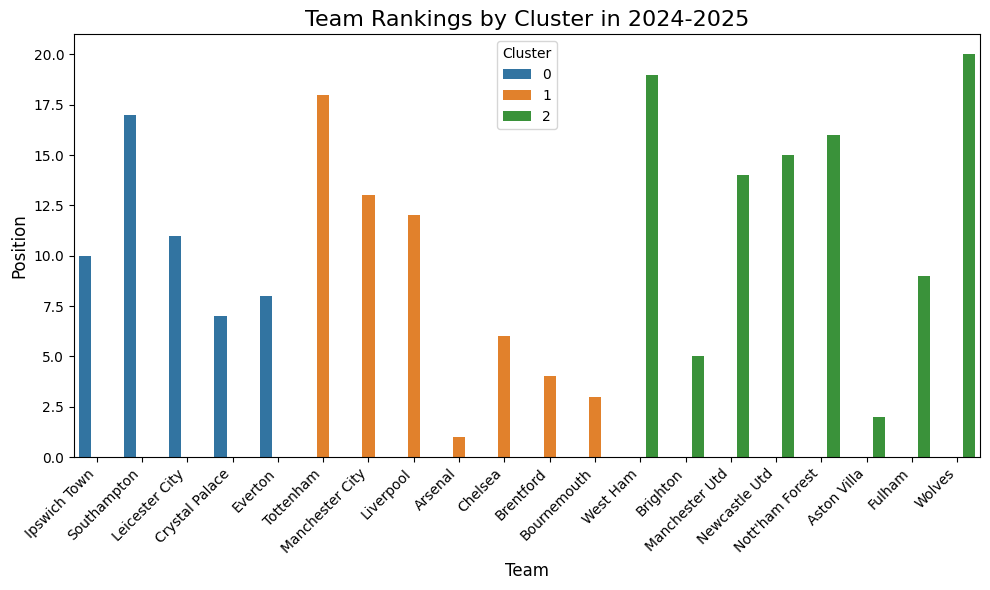

In [615]:
plt.figure(figsize=(10, 6))
data = data.sort_values(by='cluster', ascending=True)
sns.barplot(
    data=data,
    x='Squad',
    y='position',
    hue='cluster',
    dodge=True,
    palette='tab10'
)
plt.title('Team Rankings by Cluster in 2024-2025', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Position', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()

plt.show()

After viewing the two bar graphs, we can see that many of the teams are grouped together well. Even though there are some outliers due to the season not being finished, there is still a clear trend among the teams.

# Insights
Overall, we can see that there is a relationship between the expected number of goals and the actual number of goals, in relation with the ranking. If a team score more goals than their expected at each game, then they have a good chance of ending higher in the rankings, when compared to other teams that either meet or score below their expectations.

In [616]:
def match_result(row):
    if row['HomeGoals'] > row['AwayGoals']:
        return 1
    elif row['HomeGoals'] == row['AwayGoals']:
        return 0
    else:
        return -1

pl_matches_df = pl_matches_df.copy()  # to fix some weird error
pl_matches_df['Match_Result'] = pl_matches_df.apply(match_result, axis=1)

pl_matches_df['Date'] = pd.to_datetime(pl_matches_df['Date'])
pl_matches_df = pl_matches_df.sort_values('Date').reset_index(drop=True)

team_stats = {}
features = []

for index, row in pl_matches_df.iterrows():
    season = row['Season_End_Year']
    home_team = row['Home']
    away_team = row['Away']

    for team in [home_team, away_team]:
        if (season, team) not in team_stats:
            team_stats[(season, team)] = {'Goals_For': 0, 'Goals_Against': 0, 'Matches_Played': 0}

    home_stats = team_stats[(season, home_team)]
    away_stats = team_stats[(season, away_team)]

    if home_stats['Matches_Played'] > 0:
        home_avg_gf = home_stats['Goals_For'] / home_stats['Matches_Played']
        home_avg_ga = home_stats['Goals_Against'] / home_stats['Matches_Played']
    else:
        home_avg_gf = home_avg_ga = 0

    if away_stats['Matches_Played'] > 0:
        away_avg_gf = away_stats['Goals_For'] / away_stats['Matches_Played']
        away_avg_ga = away_stats['Goals_Against'] / away_stats['Matches_Played']
    else:
        away_avg_gf = away_avg_ga = 0

    goal_diff_for = home_avg_gf - away_avg_gf
    goal_diff_against = home_avg_ga - away_avg_ga

    features.append({
        'Match_Result': row['Match_Result'],
        'Home_Avg_GF': home_avg_gf,
        'Home_Avg_GA': home_avg_ga,
        'Away_Avg_GF': away_avg_gf,
        'Away_Avg_GA': away_avg_ga,
        'Goal_Diff_For': goal_diff_for,
        'Goal_Diff_Against': goal_diff_against,
    })

    home_stats['Goals_For'] += row['HomeGoals']
    home_stats['Goals_Against'] += row['AwayGoals']
    home_stats['Matches_Played'] += 1

    away_stats['Goals_For'] += row['AwayGoals']
    away_stats['Goals_Against'] += row['HomeGoals']
    away_stats['Matches_Played'] += 1

# features dataframe
features_df = pd.DataFrame(features)


X = features_df[['Home_Avg_GF', 'Home_Avg_GA', 'Away_Avg_GF', 'Away_Avg_GA', 'Goal_Diff_For', 'Goal_Diff_Against']]
y = features_df['Match_Result']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Primary Analysis

Reason for choosing Logistic Regression:
For analyzing home-field advantage, Logistic Regression was chosen because we aim to predict match outcomes (Win, Draw, Loss), which is a classification problem with three discrete classes. Logistic Regression provides model coefficients that help us interpret the impact of features (like average goals scored and conceded) on match outcomes, making it easier to understand the influence of the home field.

These are the features that I included in the model because they directly relate to team performance and are expected to influence match outcomes, particularly with respect to home-field advantage.

1) Home_Avg_GF: Average goals scored by the home team before the match.

2) Home_Avg_GA: Average goals conceded by the home team before the match.

3) Away_Avg_GF: Average goals scored by the away team before the match.

4) Away_Avg_GA: Average goals conceded by the away team before the match.

5) Goal_Diff_For: Difference in goals scored between the home and away teams.

6) Goal_Diff_Against: Difference in goals conceded between the home and away teams.

The target variable was the Match_Result, categorized as:

1 for a Home Win

0 for a Draw

-1 for a Home Loss

In [617]:
# training the model and predicting
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation from the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Classification Report:
              precision    recall  f1-score   support

          -1       0.53      0.38      0.44       697
           0       0.00      0.00      0.00       484
           1       0.51      0.88      0.65       947

    accuracy                           0.52      2128
   macro avg       0.35      0.42      0.36      2128
weighted avg       0.40      0.52      0.43      2128



Based on the classification report, the precision for wins is 0.51, which indicates moderate accuracy in predicting wins. The precision for losses is 0.53, which indicates moderate accuracy in predicting losses. The precision for draws is low probably due to their lower representation in the data.

With the accuracy, we can see that the model can somewhat predict match outcomes.

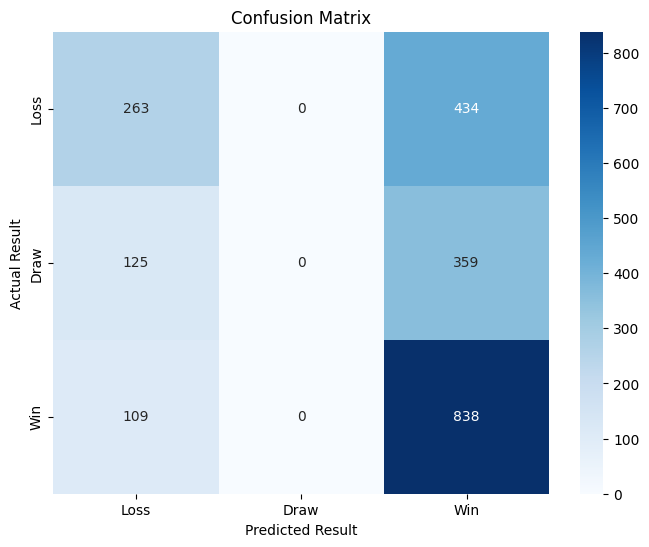

In [618]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Draw', 'Win'], yticklabels=['Loss', 'Draw', 'Win'])
plt.xlabel('Predicted Result')
plt.ylabel('Actual Result')
plt.title('Confusion Matrix')
plt.show()

We can see from this confusion matrix that it predicted wins pretty well since 838 out of 946 actual wins were predicted correctly. However, we can see it struggled with predicting draws from other outcomes.

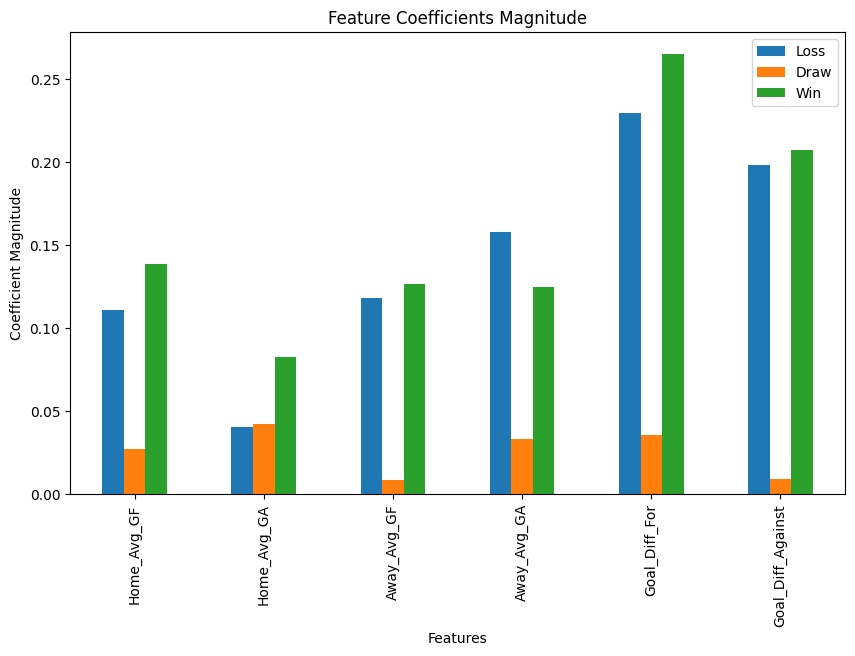

In [619]:
# model coefficients
coefficients = pd.DataFrame(model.coef_, columns=X.columns, index=['Loss', 'Draw', 'Win'])
coefficients = coefficients.T
coefficients

# plotting the coefficient magnitudes
abs_coefficients = coefficients.abs()
abs_coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Coefficients Magnitude')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.show()

The magnitude of the coefficients shows which features most influence the predictions:

Goal_Diff_For: The most impactful feature, emphasizing the importance of scoring differences.

Home_Avg_GF: Positively impacts predictions for home wins.

Away_Avg_GF: Negatively impacts home wins, showing the strength of the away team.

# Insights from the Analysis

###Home Field Advantage:

The model confirms the significance of home-field advantage, with features like Home_Avg_GF and Goal_Diff_For strongly influencing predictions for home wins.
However, the ability to predict draws is limited, suggesting that draws may depend on external factors not captured in the dataset.

###Model Performance:

The model performs moderately well for wins and losses but struggles with draws, likely due to class imbalances or overlapping feature distributions.

###Feature Importance:

The dominance of Goal_Diff_For as a feature shows the important role of scoring differences in match outcomes.

#Conclusion

The analysis demonstrates the influence of home-field advantage in Premier League matches. It explains how scoring patterns and team performance before the match can predict outcomes.


# Insights and Conclusions


We see that there is not a statistically significant difference between the mean goals and expected mean goals for the 2023-2024 season. After running the t-test, we calculated a p value leading us to fail to reject the null hypothesis. However, when we ran the z-test, the p value was small enough that we reject the null hypothesis to say that there is a statistically significant difference in goals scored in the away games vs home games. We realized the result of the z-test is more meaningful because the t-test is meant for comparing smaller sample sizes with unknown standard deviations and the z-test is for comparing large sample sizes with known standard deviations, so the data and information we had was more appropriate for the z-test.
The k-means test showed that teams are generally clustered into one of the three groups with the exception of a few outliers. Since we ran this test on two seasons, and noticed this same pattern of clustering based on expected goals, we can conclude that generally K-means clustering is an accurate measure of classification for our datasets.

 The logistic regression analysis shows the influence of home-field advantage in Premier League matches and shows how features such as Home_Avg_GF and Goal_Diff_For played important roles in predicting home vs. away wins. Overall, the model was able to predict wins and losses pretty accurately, but it struggled to predict draws due to class imbalances and external factors that are not present in this dataset. In general, the analysis shows the influence of home-field advantage in Premier League matches. It explains how scoring patterns and team performance before the match can predict outcomes.



Overall, through our exploration and ML analysis, we are able to better understand the trends of the Premier League, whether it relates to home field advantage, goal statistics, or league standings.